# HW1: Data visualization (Due by Apr 14 11:59pm)

## Amay Jain

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

References - https://www.geeksforgeeks.org/how-to-overlap-two-barplots-in-seaborn/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import month_name
from math import floor, ceil

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
temp_1 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv")

temp_2 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv")

temps = pd.concat([temp_1, temp_2])

## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
fips = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")

# Some country names include quotes
fips = fips.replace('"', '', regex = True)

# Burma and Myanmar have the same FIPS code
fips = fips[fips['Name'] != 'Burma']

fips = fips.rename(columns = {"Name": "Country"})

station = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")

station = station.rename(columns = {"NAME": "Station Name"})

station['FIPS 10-4'] = station['ID'].str[0:2]

station_country = station.merge(fips, on = 'FIPS 10-4')

df = temps.merge(station_country, on = 'ID').drop(["FIPS 10-4", "ISO 3166", "STNELEV"], axis = 1)

temp_cols = ['VALUE' + str(i) for i in range(1, 13)]

df[temp_cols] = df[temp_cols] / 100

df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,LATITUDE,LONGITUDE,Station Name,Country
0,AG000060390,1901,10.34,8.44,11.64,15.34,15.64,23.54,24.44,23.64,22.14,16.04,13.64,10.04,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
1,AG000060390,1902,9.84,11.94,12.54,15.44,15.14,19.84,24.84,25.74,21.64,16.94,14.94,11.34,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
2,AG000060390,1903,11.44,10.64,12.66,13.46,16.46,19.06,23.26,24.46,21.46,19.26,13.56,10.56,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
3,AG000060390,1904,9.26,11.26,11.36,14.06,18.36,21.26,25.16,26.06,20.76,18.26,13.76,12.46,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
4,AG000060390,1905,9.06,8.66,13.86,15.76,15.96,21.46,23.26,24.96,22.06,17.16,13.86,10.76,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181196,ZI000067983,2012,21.86,NaN,21.57,18.33,18.35,16.25,15.63,NaN,20.34,NaN,22.98,21.99,-20.2000,32.616,CHIPINGE,Zimbabwe
181197,ZI000067983,2013,NaN,21.63,20.54,18.70,17.29,16.86,15.28,18.62,21.00,19.67,22.58,21.42,-20.2000,32.616,CHIPINGE,Zimbabwe
181198,ZI000067983,2014,NaN,21.87,NaN,NaN,NaN,NaN,NaN,NaN,20.87,21.10,22.97,NaN,-20.2000,32.616,CHIPINGE,Zimbabwe
181199,ZI000067983,2015,21.75,22.51,20.83,19.52,18.80,16.70,16.50,18.10,20.10,22.90,22.30,24.05,-20.2000,32.616,CHIPINGE,Zimbabwe


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [4]:
def query_climate(df, country, year_begin, year_end, month):

    """
    Provides a subset of a temperature dataframe for a specific country, year range, and month.
 
    Args:
        df (dataframe): Temperature dataframe
        country (string): Country
        year_begin (int): Start year
        year_end (int): End year
        month (int): Month
 
    Returns:
        dataframe: Subset of temperature dataframe after filtering given country, year range, and month
    """

    copy_df = df.copy()

    # Filter specific country and year range
    filters = (copy_df['Country'] == country) & (copy_df['Year'] >= year_begin) & (copy_df['Year'] <= year_end)

    # Selected column that has given month
    selected_month = 'VALUE' + str(month)

    # New column for given month
    copy_df['Month'] = month

    # Columns of dataframe we want to return
    columns_wanted = ['Station Name', 
                      'LATITUDE', 
                      'LONGITUDE', 
                      'Country', 
                      'Year',
                      'Month',
                      selected_month]

    # Subset of temperature dataframe
    final_df = copy_df[filters][columns_wanted].rename(columns = {selected_month: "Temp"})

    return final_df

Run this example and check if you get the correct result, your obtained dataframe looks like:

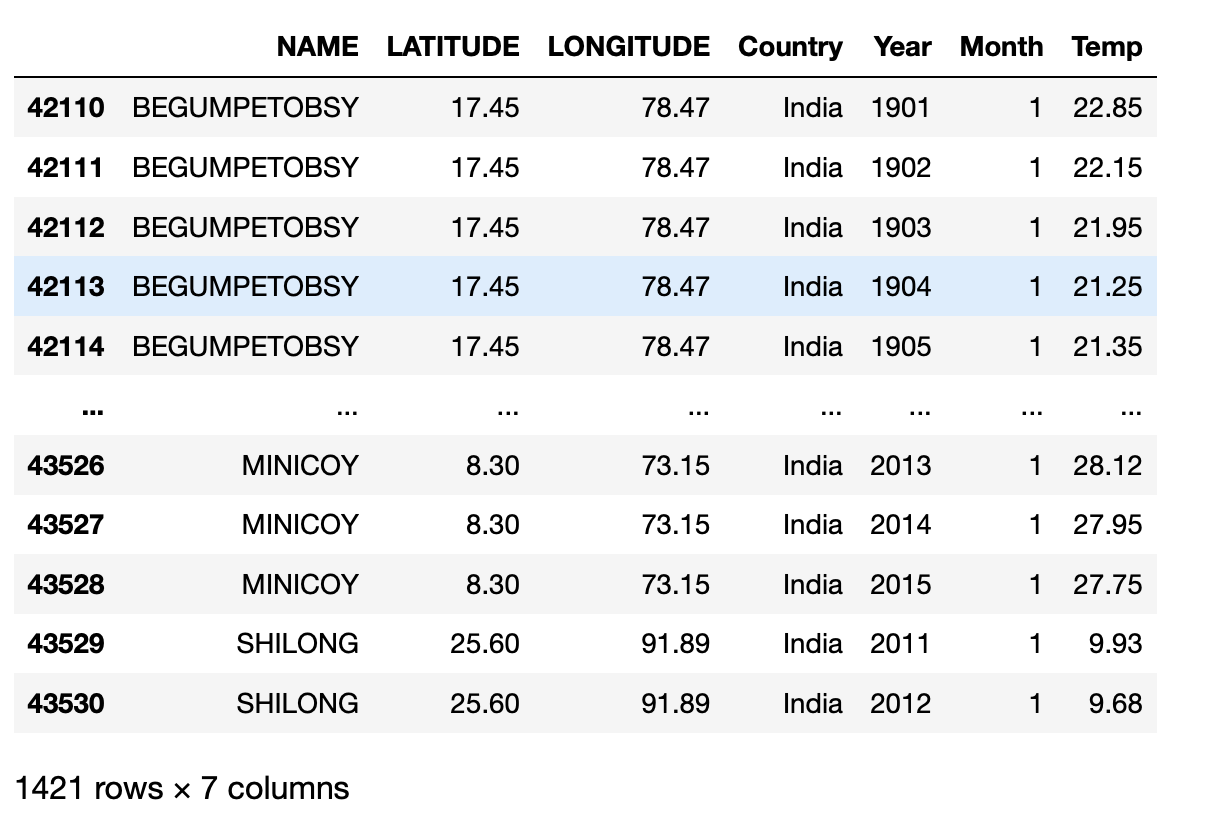

In [5]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,Station Name,LATITUDE,LONGITUDE,Country,Year,Month,Temp
10789,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
10790,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
10791,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
10792,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
10793,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
97434,MINICOY,8.30,73.15,India,2013,1,28.12
97435,MINICOY,8.30,73.15,India,2014,1,27.95
97436,MINICOY,8.30,73.15,India,2015,1,27.75
97437,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

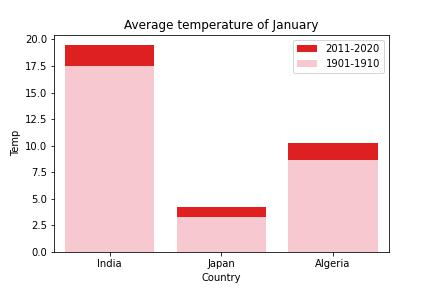

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

In [6]:
# Stack all columns that hold monthly temperatures 
plot_df = df.copy()
plot_df = plot_df.set_index(keys = ['ID', 'Year', 'Station Name', 'LATITUDE', 'LONGITUDE', 'Country'])
plot_df = plot_df.stack()
plot_df = plot_df.reset_index()
plot_df = plot_df.rename(columns = {'level_6': 'Month', 0: 'Temperature (C)'})
plot_df['Month'] = plot_df['Month'].str[5:].astype(int) 
plot_df['Range'] = plot_df['Year'].apply(lambda x: '1901 - 1910' if x <= 1910 else '2011 - 2020') 

# Calculate average temperatures for each unique country, year range, and month
avg_temps = plot_df.groupby(['Country', 'Range', 'Month'], as_index = False).mean(numeric_only = True)
avg_temps = avg_temps.sort_values(by = ['Country', 'Range', 'Month'])

# Choose countries and months to subset avg_temps dataframe
countries = sorted(['Vietnam', 'Australia', 'Denmark', 'Belgium'])
months = [3, 4, 5, 8, 9, 10]
temps_plot = avg_temps[(avg_temps['Country'].isin(countries)) & (avg_temps['Month'].isin(months))]

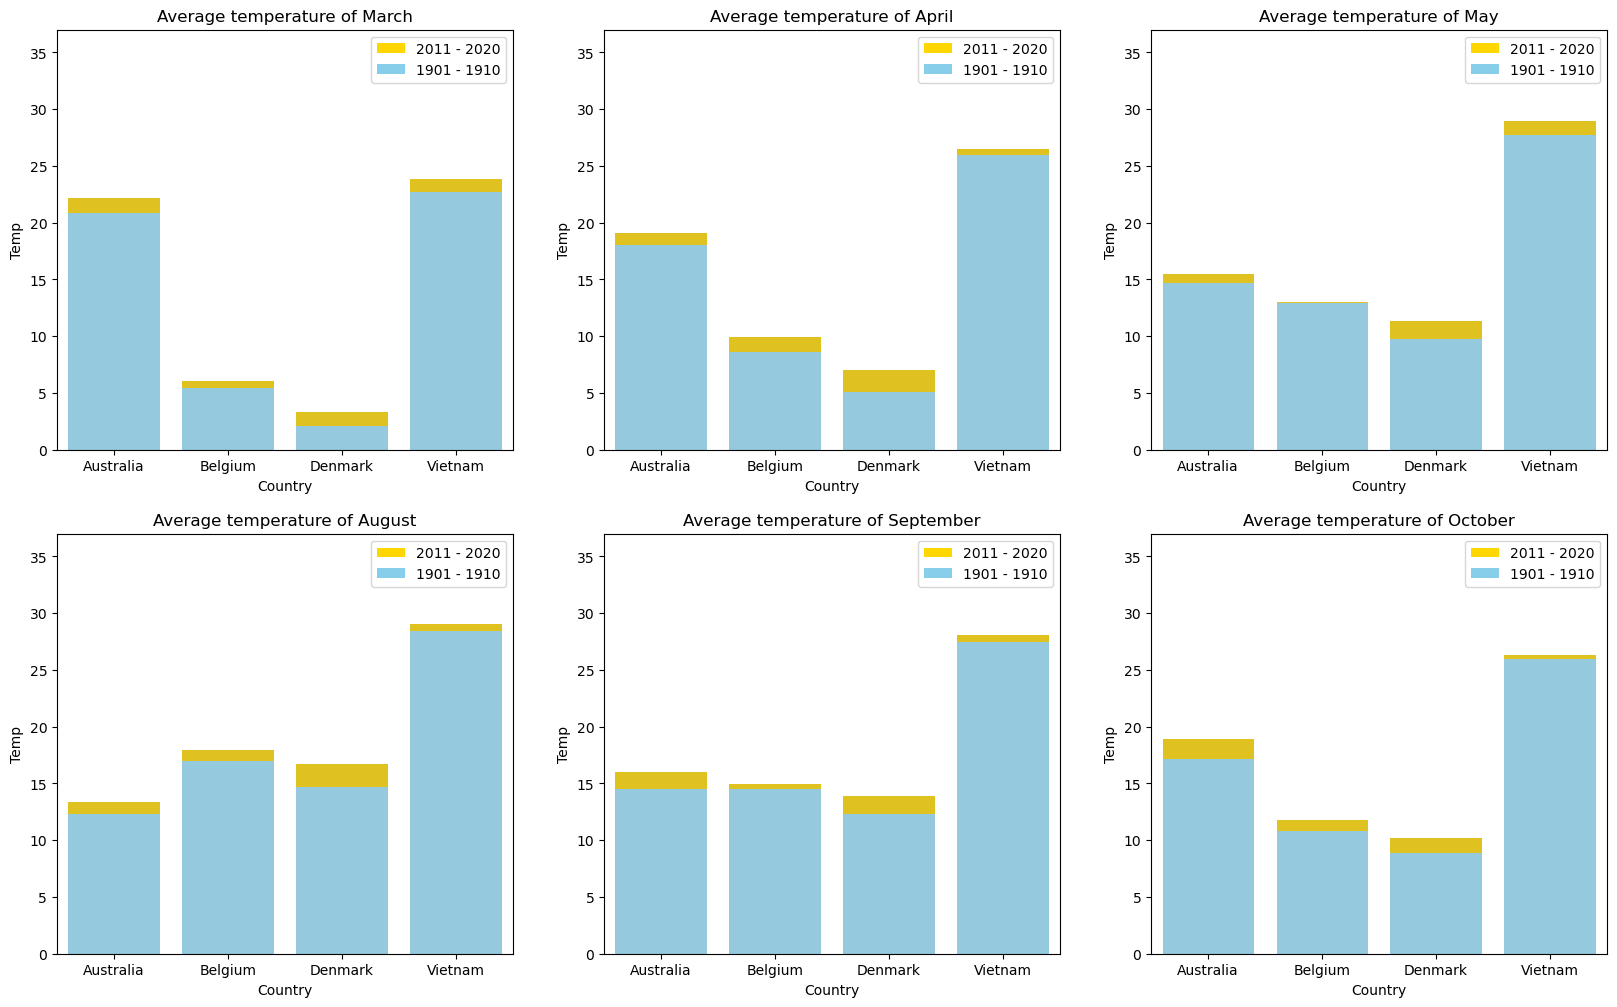

In [7]:
def plotter():

    """
    Provides plots of average temperatures for two different time ranges across 4 different countries and 6 months.
    
    Args:
        None
 
    Returns:
        Nothing
    """

    # function start
    
    fig, ax = plt.subplots(2, 3, sharey = False, figsize = (20, 12))

    color1 = 'gold'

    color2 = 'skyblue'

    ymin = floor(temps_plot['Temperature (C)'].min()) - 2

    ymax = ceil(temps_plot['Temperature (C)'].max()) + 7

    # Setting up legend boxes
    topbar = plt.Rectangle((0,0), 1, 1, fc = color1, edgecolor = 'none')
    bottombar = plt.Rectangle((0,0), 1, 1, fc = color2,  edgecolor = 'none')

    # Plotting by each month
    for i in range(6):
            
        specific_country_data = temps_plot[temps_plot['Month'] == months[i]]
            
        early_temps = specific_country_data[specific_country_data['Range'] == '1901 - 1910']['Temperature (C)'].values

        late_temps = specific_country_data[specific_country_data['Range'] == '2011 - 2020']['Temperature (C)'].values

        plotting = pd.DataFrame({'Country': countries, 
                                 '1900s': early_temps, 
                                 '2000s': late_temps})

        # Top 3 plots
        if i < 3:

            # Plot average temperatures for 2011 - 2020 first
            sns.barplot(x = plotting["Country"], 
                        y = plotting["2000s"], 
                        color = color1, 
                        ax = ax[0, i])

            # Overlay average temperatures for 1901 - 1910 on top
            sns.barplot(x = plotting["Country"], 
                        y = plotting["1900s"], 
                        color = color2, 
                        ax = ax[0, i])
            
            ax[0, i].legend([topbar, bottombar], 
                            ['2011 - 2020', '1901 - 1910'], 
                            loc = 0, 
                            prop = {'size': 10})
            
            ax[0, i].set_title('Average temperature of ' + month_name[months[i]])

            ax[0, i].set_ylim(ymin, ymax)

            ax[0, i].set(ylabel = "Temp")

        # Bottom 3 plots
        else:

            # Plot average temperatures for 2011 - 2020 first
            sns.barplot(x = plotting["Country"], 
                        y = plotting["2000s"], 
                        color = color1, 
                        ax = ax[1, i - 3])

            # Overlay average temperatures for 1901 - 1910 on top
            sns.barplot(x = plotting["Country"], 
                        y = plotting["1900s"], 
                        color = color2, 
                        ax = ax[1, i - 3])
            
            ax[1, i - 3].legend([topbar, bottombar], 
                                ['2011 - 2020', '1901 - 1910'], 
                                loc = 0, 
                                prop = {'size': 10})
            
            ax[1, i - 3].set_title('Average temperature of ' + month_name[months[i]])

            ax[1, i - 3].set_ylim(ymin, ymax)

            ax[1, i - 3].set(ylabel = "Temp")
     
    # function end      


plotter()

My conclusion is that for the 4 countries and 6 months I chose, average temperatures have risen by a small amount over the past century.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

<Axes: xlabel='VALUE1', ylabel='VALUE7'>

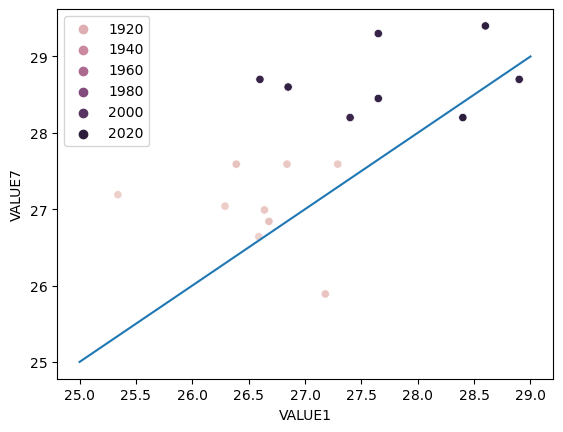

In [8]:
# Scatterplot

data = df[df['Country'] == 'Singapore']

# January and July have the highest correlation
data.corr(numeric_only = True)

sns.scatterplot(data = data, 
                x = "VALUE1", 
                y = "VALUE7", 
                hue = "Year")

sns.lineplot(x = range(25, 30), y = range(25, 30))

For Singapore specifically, I wanted to see which variables had the highest correlation with one another and surprisingly the January and July temperatures did. The temperatures were really close to one another as seen with the y = x line above and more surprisingly, it seems like some sort of clustering analysis would be more appropriate than a regression line based on the year ranges.

<Axes: xlabel='LATITUDE', ylabel='Temperature (C)'>

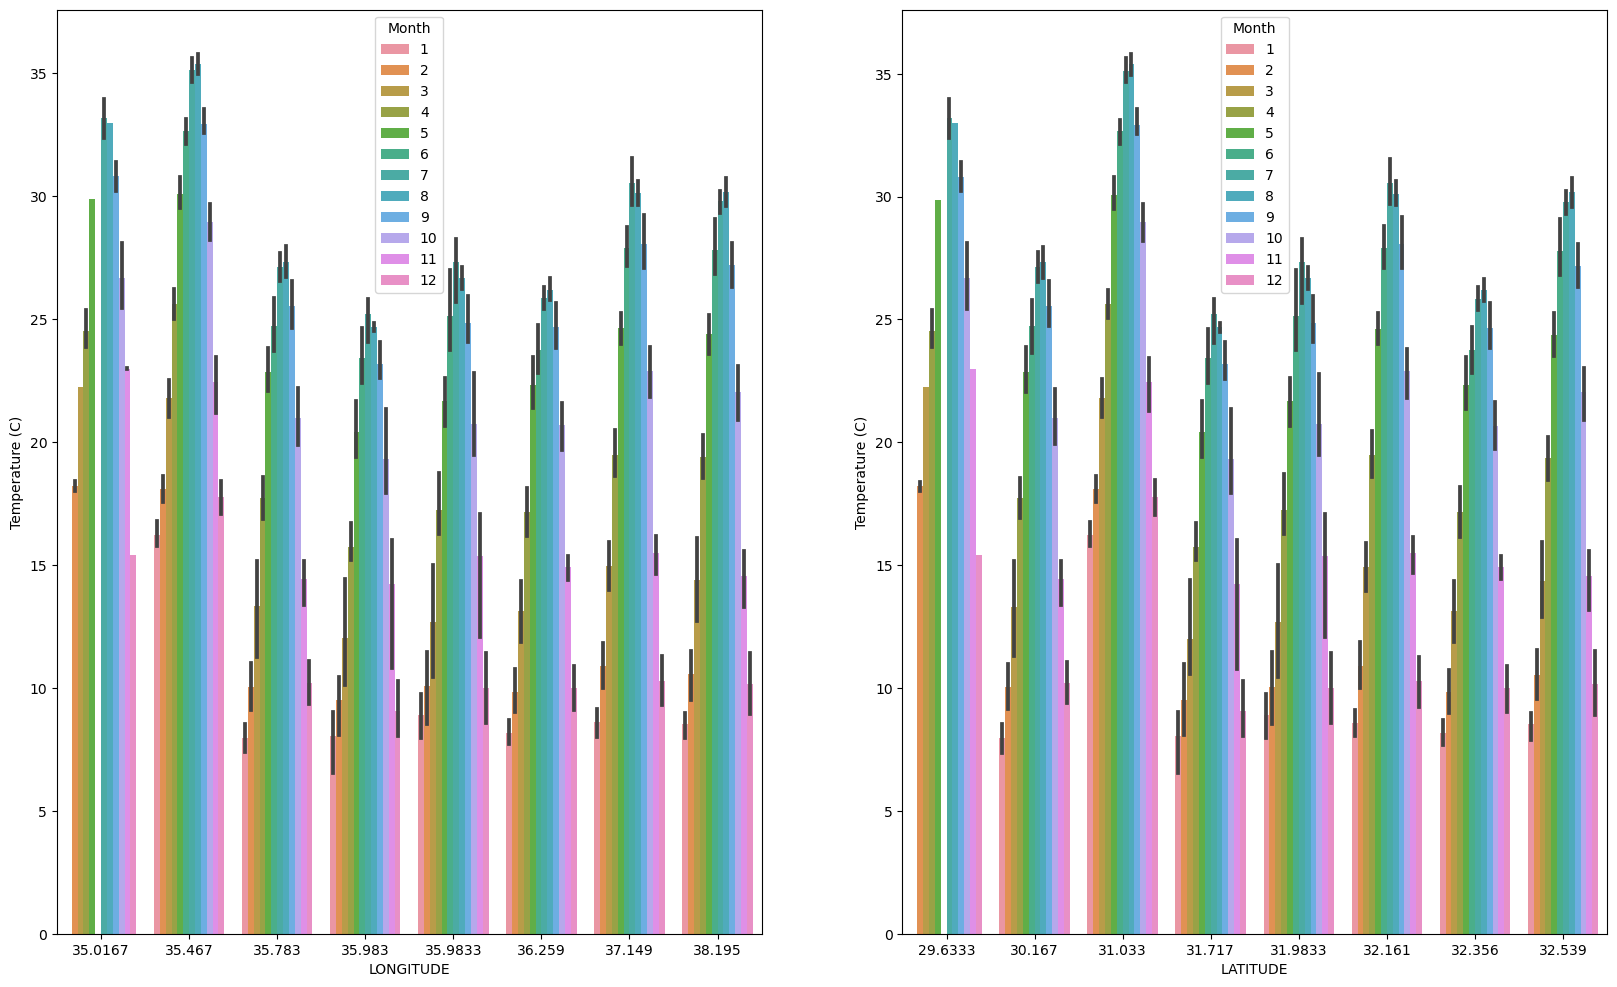

In [9]:
# Barplot

fig, ax = plt.subplots(1, 2, figsize = (20, 12))

sns.barplot(data = plot_df[plot_df['Country'] == 'Jordan'], 
                x = 'LONGITUDE',
                y = 'Temperature (C)',
                hue = "Month",
                ax = ax[0])

sns.barplot(data = plot_df[plot_df['Country'] == 'Jordan'], 
                x = 'LATITUDE',
                y = 'Temperature (C)',
                hue = "Month",
                ax = ax[1])

I wanted to see if latitude or longitude had any noticeable pattern when it came to observing the distribution of temperatures in Jordan across various months. Above, the more west and south you go, the higher the temperatures (near the equator). Rather than noticing anything with the coordinates, it looks like the seasonal temperature patterns are similar to America with the early and late months being colder than the middle months.

<Axes: xlabel='Year', ylabel='Temperature (C)'>

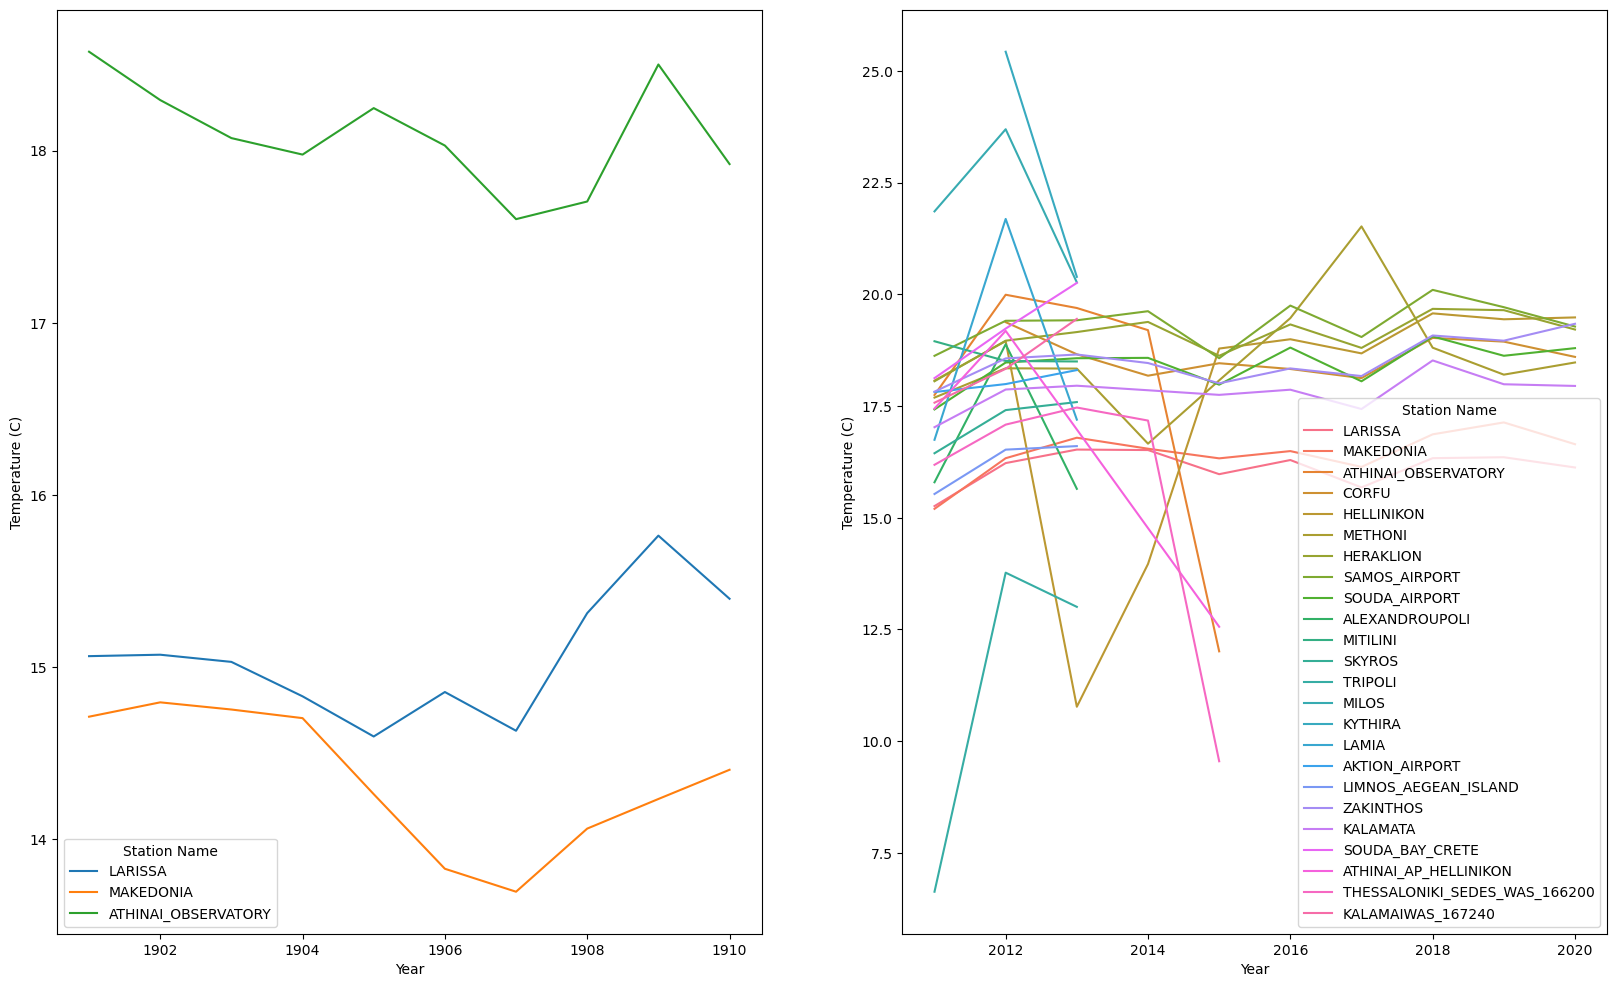

In [10]:
# Lineplot

fig, ax = plt.subplots(1, 2, figsize = (20, 12))

sns.lineplot(data = plot_df[(plot_df['Country'] == 'Greece') & (plot_df['Year'] < 2000)],
             x ='Year',
             y = 'Temperature (C)',
             hue = 'Station Name', 
             errorbar = None,
             ax = ax[0])

sns.lineplot(data = plot_df[(plot_df['Country'] == 'Greece') & (plot_df['Year'] > 2000)],
             x ='Year',
             y = 'Temperature (C)',
             hue = 'Station Name', 
             errorbar = None,
             ax = ax[1])

For Greece I wanted to see how temperatures varied in the 1900s vs 2000s across different stations using lineplots. In the 1900s, we only have data on 3 stations which all follow relatively similar patterns. On the other hand, in the 2000s we see data on a lot more stations even though some stations only have a few years of data but we see more variability in how the temperatures fare through the years compared to the 1900s.

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

https://github.com/amayjain/PIC16B_hw